# Jonathan Halverson
# Tuesday, April 12, 2016
# DrivenData.org: Predicting blood donations

Here we consider blood donation data from a clinic in Vietnam. We are given info about each volunteer. The response is whether or not they donated blood in March of 2007.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [2]:
column_names = ['id_number', 'months_since_last', 'number_of_donations', 'total_volume', 'months_since_first', 'donation_in_march']
df = pd.read_csv('train_blood.csv', header=0, names=column_names)
df.head()

,id_number,months_since_last,number_of_donations,total_volume,months_since_first,donation_in_march
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [3]:
df.tail()

,id_number,months_since_last,number_of_donations,total_volume,months_since_first,donation_in_march
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
id_number              576 non-null int64
months_since_last      576 non-null int64
number_of_donations    576 non-null int64
total_volume           576 non-null int64
months_since_first     576 non-null int64
donation_in_march      576 non-null int64
dtypes: int64(6)
memory usage: 27.1 KB


In [5]:
df.describe()

,id_number,months_since_last,number_of_donations,total_volume,months_since_first,donation_in_march
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


Let's examine the null value or ratio of donated to not donated:

In [6]:
outcome_table = pd.crosstab(index=df["donation_in_march"], columns="count")
outcome_table

col_0,count
donation_in_march,
0,438
1,138


In [7]:
fraction_that_donated = 138 / float(138 + 438)
fraction_that_donated

0.23958333333333334

In [8]:
df[df['donation_in_march'] == 0].iloc[:,1:-1].corr().applymap(lambda x: round(x, 2))

,months_since_last,number_of_donations,total_volume,months_since_first
months_since_last,1.00,-0.10,-0.10,0.21
number_of_donations,-0.10,1.00,1.00,0.64
total_volume,-0.10,1.00,1.00,0.64
months_since_first,0.21,0.64,0.64,1.00


In [9]:
df[df['donation_in_march'] == 1].iloc[:,1:-1].corr().applymap(lambda x: round(x, 2))

,months_since_last,number_of_donations,total_volume,months_since_first
months_since_last,1.00,-0.17,-0.17,0.10
number_of_donations,-0.17,1.00,1.00,0.71
total_volume,-0.17,1.00,1.00,0.71
months_since_first,0.10,0.71,0.71,1.00


### Feature engineering

Number of donations and total volume are perfectly correlated so we drop one of them as well as first column.

In [10]:
df = df.drop(['total_volume'], axis=1)
df['months_btwn_donation'] = df['months_since_first'] / df['number_of_donations']
df['last_to_first'] = df['months_since_last'] / df['months_since_first']
df['inverse_first'] = 1.0 / df['months_since_first']

In [11]:
df.head()

,id_number,months_since_last,number_of_donations,months_since_first,donation_in_march,months_btwn_donation,last_to_first,inverse_first
0,619,2,50,98,1,1.960000,0.020408,0.010204
1,664,0,13,28,1,2.153846,0.000000,0.035714
2,441,1,16,35,1,2.187500,0.028571,0.028571
3,160,2,20,45,1,2.250000,0.044444,0.022222
4,358,1,24,77,0,3.208333,0.012987,0.012987


In [12]:
df.describe()

,id_number,months_since_last,number_of_donations,months_since_first,donation_in_march,months_btwn_donation,last_to_first,inverse_first
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,34.050347,0.239583,8.671270,0.438532,0.077124
std,216.947773,8.175454,5.740010,24.227672,0.427200,7.362315,0.372769,0.116756
min,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.010204
25%,183.750000,2.000000,2.000000,16.000000,0.000000,4.000000,0.125000,0.020306
50%,375.500000,7.000000,4.000000,28.000000,0.000000,6.600000,0.282857,0.035714
75%,562.500000,14.000000,7.000000,49.250000,0.000000,11.500000,0.946429,0.062500
max,747.000000,74.000000,50.000000,98.000000,1.000000,74.000000,1.000000,0.500000


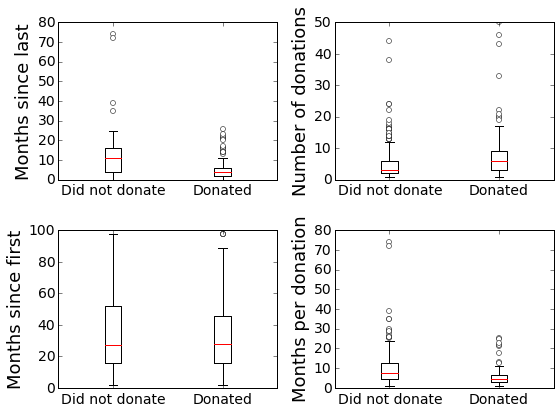

In [13]:
fprops = dict(marker='o', mfc='w', mec='k', markersize=5, linestyle='none', lw=1)
bprops = dict(color='k')
wprops = dict(color='k', linestyle='-', lw=1)
labels = ['Did not donate', 'Donated']

f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)
ax0.boxplot([df.months_since_last[df.donation_in_march==0], df.months_since_last[df.donation_in_march==1]], labels=labels, flierprops=fprops, boxprops=bprops, whiskerprops=wprops)
ax0.set_ylabel('Months since last')
ax1.boxplot([df.number_of_donations[df.donation_in_march==0], df.number_of_donations[df.donation_in_march==1]], labels=labels, flierprops=fprops, boxprops=bprops, whiskerprops=wprops)
ax1.set_ylabel('Number of donations')
ax2.boxplot([df.months_since_first[df.donation_in_march==0], df.months_since_first[df.donation_in_march==1]], labels=labels, flierprops=fprops, boxprops=bprops, whiskerprops=wprops)
ax2.set_ylabel('Months since first')
ax3.boxplot([df.months_btwn_donation[df.donation_in_march==0], df.months_btwn_donation[df.donation_in_march==1]], labels=labels, flierprops=fprops, boxprops=bprops, whiskerprops=wprops)
ax3.set_ylabel('Months per donation')
plt.tight_layout()

In [14]:
df[df['donation_in_march'] == 1].corr().applymap(lambda x: round(x, 2))

,id_number,months_since_last,number_of_donations,months_since_first,donation_in_march,months_btwn_donation,last_to_first,inverse_first
id_number,1.00,0.06,0.07,0.12,NaN,0.07,-0.02,-0.06
months_since_last,0.06,1.00,-0.17,0.10,NaN,0.54,0.47,-0.19
number_of_donations,0.07,-0.17,1.00,0.71,NaN,-0.28,-0.47,-0.36
months_since_first,0.12,0.10,0.71,1.00,NaN,0.21,-0.55,-0.58
donation_in_march,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
months_btwn_donation,0.07,0.54,-0.28,0.21,NaN,1.00,0.15,-0.28
last_to_first,-0.02,0.47,-0.47,-0.55,NaN,0.15,1.00,0.67
inverse_first,-0.06,-0.19,-0.36,-0.58,NaN,-0.28,0.67,1.00


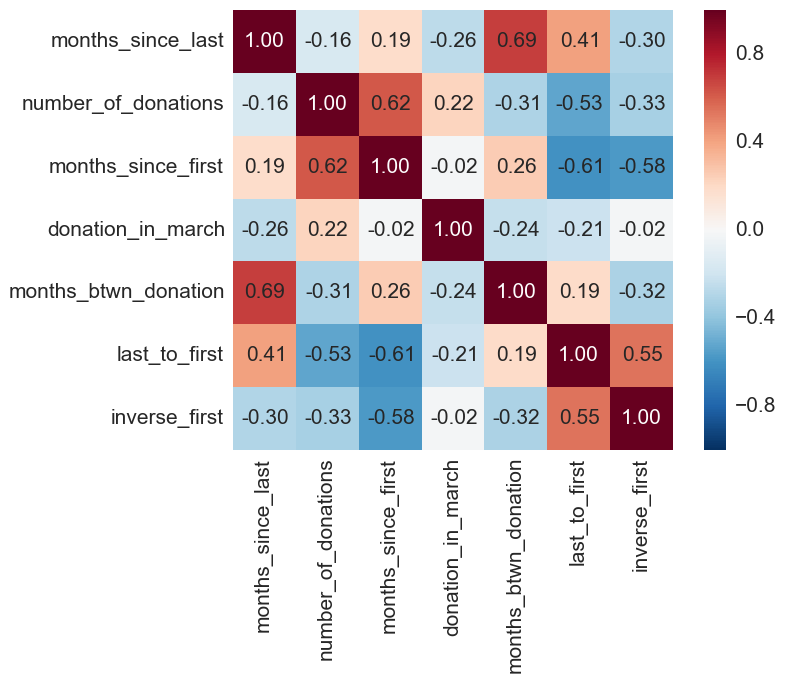

In [23]:
import seaborn as sns
cols = df.columns.tolist()[1:]
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)

In [16]:
sns.reset_orig()

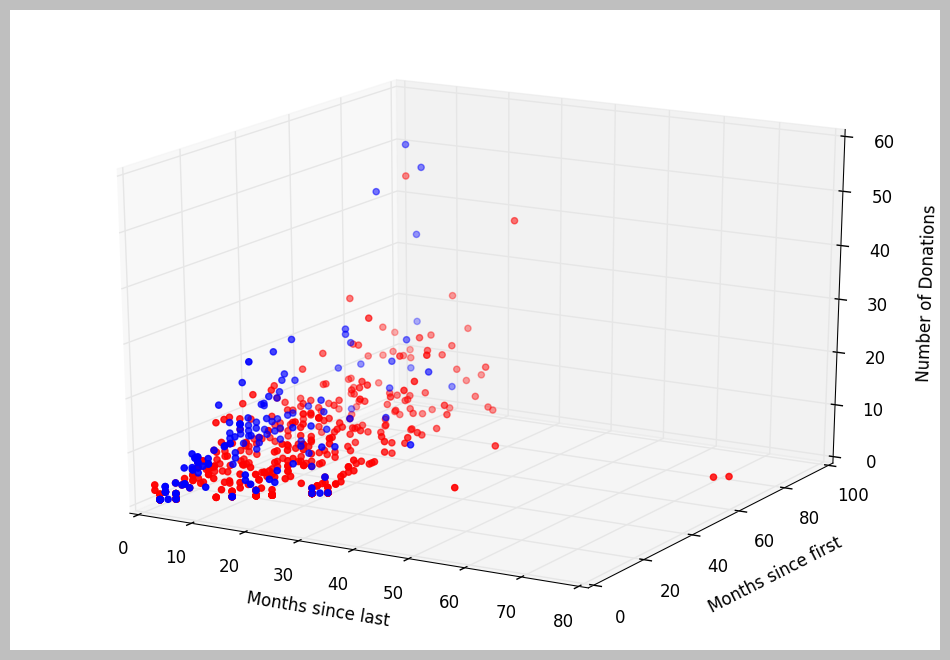

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.months_since_last[df.donation_in_march == 0],
           df.months_since_first[df.donation_in_march == 0],
           df.number_of_donations[df.donation_in_march == 0], color='r')
ax.scatter(df.months_since_last[df.donation_in_march == 1],
           df.months_since_first[df.donation_in_march == 1],
           df.number_of_donations[df.donation_in_march == 1], color='b')

ax.view_init(elev=20, azim=300)
ax.set_xlim(0, 80)
ax.set_ylim(0, 100)
ax.set_zlim(0, 60)
ax.set_xlabel('Months since last')
ax.set_ylabel('Months since first')
ax.set_zlabel('Number of Donations')

It is difficult to see what is going on in the above figure. Below we look at 2-d projections:

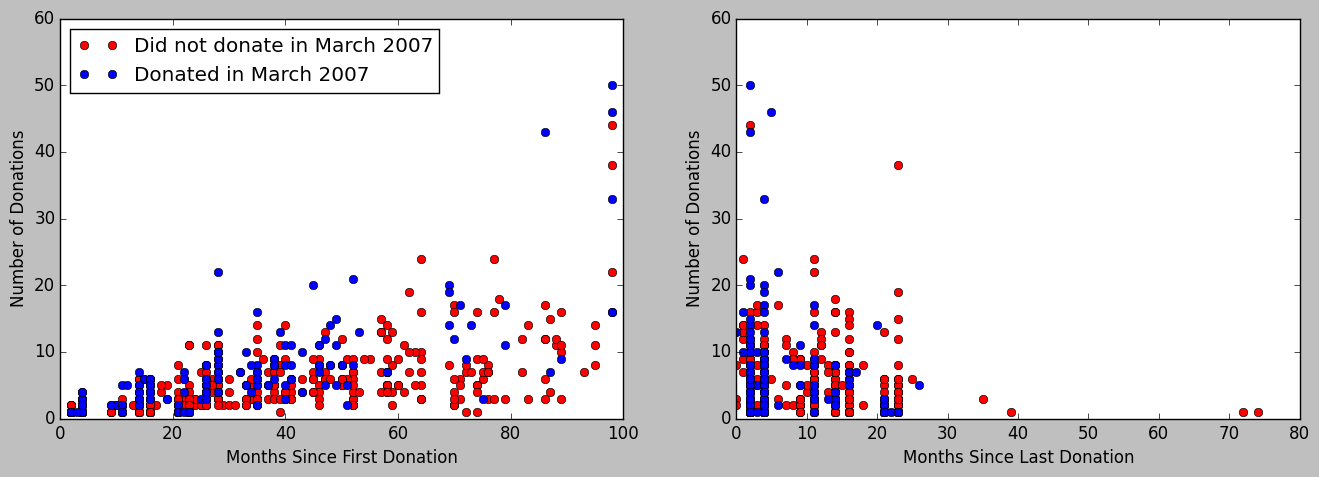

In [18]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
ax0.plot(df.months_since_first[df.donation_in_march == 0], df.number_of_donations[df.donation_in_march == 0], 'ro', label='Did not donate in March 2007')
ax0.plot(df.months_since_first[df.donation_in_march == 1], df.number_of_donations[df.donation_in_march == 1], 'bo', label='Donated in March 2007')
ax0.set_xlim(0, 100)
ax0.set_ylim(0, 60)
ax0.set_xlabel('Months Since First Donation')
ax0.set_ylabel('Number of Donations')
ax0.legend(loc='upper left')

ax1.plot(df.months_since_last[df.donation_in_march == 0], df.number_of_donations[df.donation_in_march == 0], 'ro', label='Did not donate in March 2007')
ax1.plot(df.months_since_last[df.donation_in_march == 1], df.number_of_donations[df.donation_in_march == 1], 'bo', label='Donated in March 2007')
ax1.set_xlim(0, 80)
ax1.set_ylim(0, 60)
ax1.set_xlabel('Months Since Last Donation')
ax1.set_ylabel('Number of Donations')

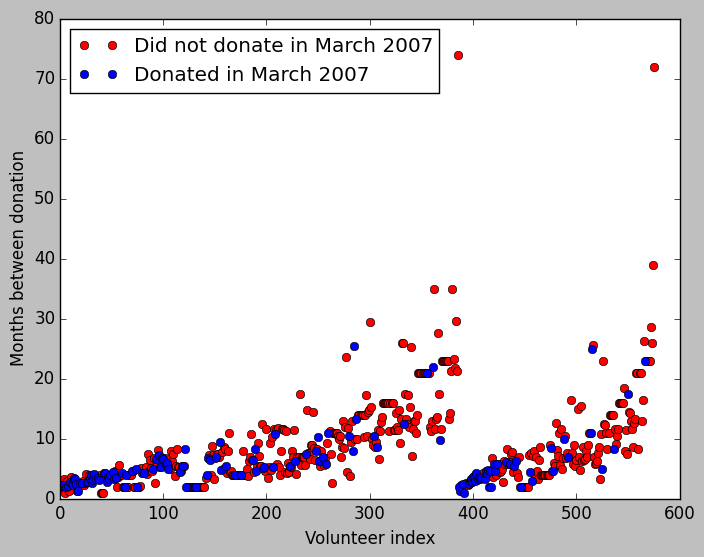

In [19]:
plt.plot(df.index[df.donation_in_march == 0], df.months_btwn_donation[df.donation_in_march == 0], 'ro', label='Did not donate in March 2007')
plt.plot(df.index[df.donation_in_march == 1], df.months_btwn_donation[df.donation_in_march == 1], 'bo', label='Donated in March 2007')
plt.xlabel('Volunteer index')
plt.ylabel('Months between donation')
plt.legend(loc='upper left')

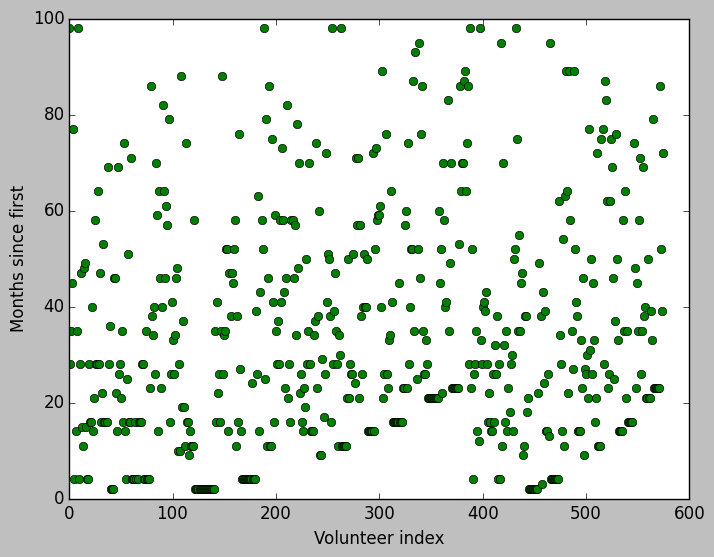

In [20]:
plt.plot(df.index, df.months_since_first, 'go')
plt.xlabel('Volunteer index')
plt.ylabel('Months since first')

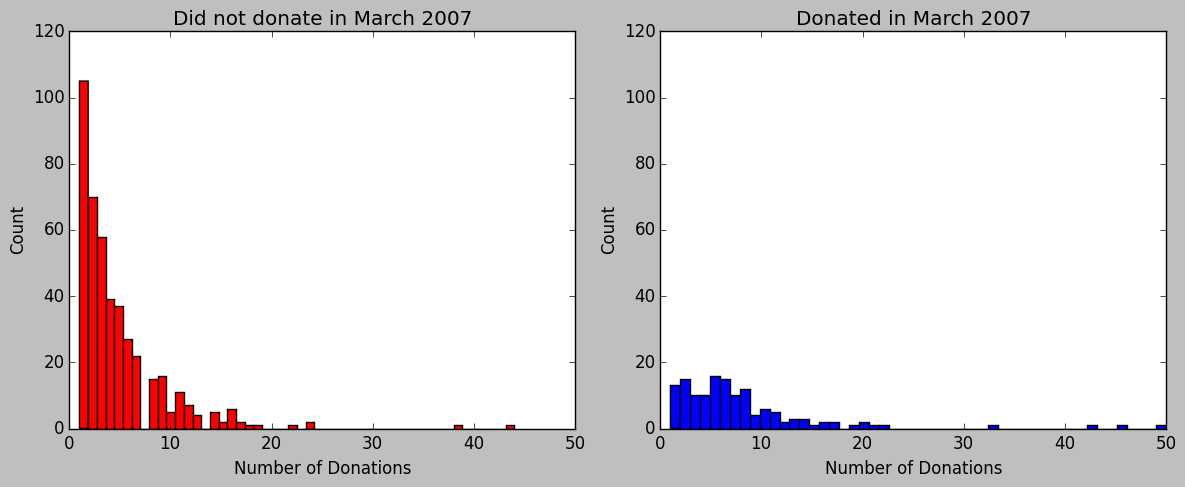

In [21]:
clr = ['red', 'blue']
title = ['Did not donate in March 2007', 'Donated in March 2007']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i, ax in enumerate(axes):
    ax.hist(df.number_of_donations[df.donation_in_march == i].values, bins=50, color=clr[i])
    ax.set_xlabel('Number of Donations')
    ax.set_ylabel('Count')
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 120)
    ax.set_title(title[i])
plt.tight_layout()

Note that the largest number of donations by someone who donated in March 2007 was around 18. The people who donated the most over the years did not donate.

Who hasn't donated in a long time?

In [22]:
df.sort_values(['months_since_last'], ascending=False).head(15)

,id_number,months_since_last,number_of_donations,months_since_first,donation_in_march,months_btwn_donation,last_to_first,inverse_first
385,350,74,1,74,0,74.000000,1.000000,0.013514
575,74,72,1,72,0,72.000000,1.000000,0.013889
574,541,39,1,39,0,39.000000,1.000000,0.025641
384,673,35,3,64,0,21.333333,0.546875,0.015625
368,281,26,5,49,1,9.800000,0.530612,0.020408
560,183,25,6,50,0,8.333333,0.500000,0.020000
327,378,23,2,23,0,11.500000,1.000000,0.043478
370,117,23,1,23,0,23.000000,1.000000,0.043478
281,325,23,15,57,0,3.800000,0.403509,0.017544
383,597,23,3,89,0,29.666667,0.258427,0.011236


We see that there are volunteers who only donated once a few years ago but never again.